# То же самое в Python (Pylab) + нюансы netcdf

pkg load netcdf

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ncread

NameError: name 'ncread' is not defined

Чтобы прочитать netcdf в python есть несколько вариантов. В данном уроке рассмотрим низкоуровневую библиотеку netCDF4

**Задание**: установите пакет netCDF4  в свое окружение

In [3]:
from netCDF4 import Dataset

In [4]:
fname4 = '/home/mizyuk/DataW2/AO_MexicanGulf_by_Dop5/SST_Reinolds_7D_AO_MexicanGulf_all_auto.mat.nc' # имя файла

In [5]:
f = Dataset(fname4) # инфо к nc файлу

загружаем перменные

In [6]:
f

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    creation_time: 19-Nov-2018 16:55:09
    product: SST_Reinolds_7D
    creator: MHI, Remote Sensing Department, Kubryakov A.A.
    source: Reinolds
    grid_mapping: crs
    dimensions(sizes): lat(56), lon(72), date(476)
    variables(dimensions): float32 aa(date,lon,lat), float32 lon(lon), float32 lat(lat), float32 time(date)
    groups: 

In [7]:
x = f.variables['lon'] # долгота
y = f.variables['lat'] # широта
d = f.variables['time'] # дата
aa = f.variables['aa'] # массив температуры

In [8]:
type(x)

netCDF4._netCDF4.Variable

класс переменной netcdf

In [9]:
x

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    _FillValue: nan
    longname: Longitude
unlimited dimensions: 
current shape = (72,)
filling on

класс array

В данно случае чтобы превратить переменную netcdf в array сделаем следующее

In [10]:
x[:]

masked_array(data=[-97.875, -97.625, -97.375, -97.125, -96.875, -96.625,
                   -96.375, -96.125, -95.875, -95.625, -95.375, -95.125,
                   -94.875, -94.625, -94.375, -94.125, -93.875, -93.625,
                   -93.375, -93.125, -92.875, -92.625, -92.375, -92.125,
                   -91.875, -91.625, -91.375, -91.125, -90.875, -90.625,
                   -90.375, -90.125, -89.875, -89.625, -89.375, -89.125,
                   -88.875, -88.625, -88.375, -88.125, -87.875, -87.625,
                   -87.375, -87.125, -86.875, -86.625, -86.375, -86.125,
                   -85.875, -85.625, -85.375, -85.125, -84.875, -84.625,
                   -84.375, -84.125, -83.875, -83.625, -83.375, -83.125,
                   -82.875, -82.625, -82.375, -82.125, -81.875, -81.625,
                   -81.375, -81.125, -80.875, -80.625, -80.375, -80.125],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [11]:
size(x)

72

In [12]:
size(aa)

1919232

Функция shape

In [13]:
shape(aa)

(476, 72, 56)

Некоторые функции для классов реализованны как свойства. Свойства классов вызываются через "." после имени переменной

In [14]:
aa.shape

(476, 72, 56)

мы получили такую размерность массива. Проверим чему они соответсвтуют.

In [15]:
f

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    creation_time: 19-Nov-2018 16:55:09
    product: SST_Reinolds_7D
    creator: MHI, Remote Sensing Department, Kubryakov A.A.
    source: Reinolds
    grid_mapping: crs
    dimensions(sizes): lat(56), lon(72), date(476)
    variables(dimensions): float32 aa(date,lon,lat), float32 lon(lon), float32 lat(lat), float32 time(date)
    groups: 

*Примечание №1*: 
мы получили следующее положение размерностей:

**T(время) X(долгота) Y(широта)**

Однако, согласно [cf-конвенций](http://cfconventions.org/cf-conventions/cf-conventions#dimensions)
их положение предлагается (хоть и не требуется!) таким:

**T(время) [Z(глубина)] Y(широта) X(долгота)**

Проверим это на одном из массивов REMSS

In [16]:
f1 = Dataset('/home/mizyuk/DataW2/REMSS/testdatasets/REMSS/la_plata_20060101_20081231.nc')

In [17]:
f1

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(1096), lat(250), lon(205)
    variables(dimensions): int64 time(time), int16 analysed_sst(time,lat,lon)
    groups: 

In [18]:
f1.close()

Увидим, к чему это приведет позже...

Математические операции определены только для класса array из пакета numpy

In [19]:
aa = aa[:]

в numpy для работы с массивами с пропущенными данными есть специальный подкласс masked_array

In [20]:
aa

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [27.780000686645508, 27.780000686645508, 27.790000915527344,
          ..., 16.90999984741211, 15.850000381469727,
          14.489999771118164],
         [27.8799991607666, 27.8700008392334, 27.850000381469727, ...,
          19.09000015258789, 17.799999237060547, 15.789999961853027],
         [27.93000030517578, 27.920000076293945, 27.8700008392334, ...,
          20.84000015258789, 19.510000228881836, 17.639999389648438]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [27.34000015258789, 27.3799991607666, 27.3799991607666, ...,
          17.860000610351562, 16.809999465942383, 15.65999984741211],
         [27.31999969482422, 27.34000015258789, 27.3700008392334, ...,
          19.6299991607666, 18.260000228881836, 16.690000534057617]

aa(aa==0)=nan; % 0all zeros to Nan (Not A Number)

Воспользуемся функцией pcolor (или image) для визуализации

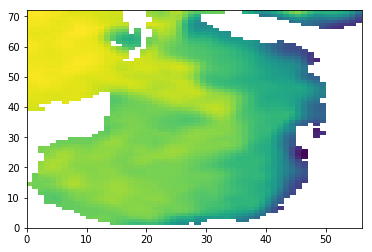

In [21]:
pcolormesh(aa[0])

*Примечание №2*:  в python если вы итерируете по внешней размерности не обязательно указывать остальные. Это связано с важным свойством, которым мы будем пользоваться позже!

Сейчас, возможно, кто-то заметил, какая проблема у нас возникла.

In [22]:
picdir = 'Results/SST_Reinolds_7D/' # название директории

In [23]:
## среднее за выбранный год
dv = datevec(d) # дата переводится в вектор (год, месяц, число, день, час, минута)

NameError: name 'datevec' is not defined

функции datevec  у нас конежно же нет

In [24]:
from datetime import datetime,timedelta

In [25]:
d = d[:]

In [26]:
%load_ext oct2py.ipython

In [27]:
%octave_push d

In [28]:
%%octave
datevec(d(1:10))

ans =

   2008      1      4      0      0      0

   2008      1     11      0      0      0

   2008      1     18      0      0      0

   2008      1     25      0      0      0

   2008      2      1      0      0      0

   2008      2      8      0      0      0

   2008      2     15      0      0      0

   2008      2     22      0      0      0

   2008      2     29      0      0      0

   2008      3      7      0      0      0

Наши даты это количество дней от условного "Рождества Христова" (0-го года)

In [29]:
%%octave
datevec(1)

ans =

   0   1   1   0   0   0

*Замечание №3*: В matlab/octave придумана удобная система работы с датами. **Но**, к сожалению, она применима не везде, потому что ни в григорианском, ни в юлианском календарях нет [0-го года](https://ru.wikipedia.org/wiki/0_год)!

In [30]:
datetime(0,1,1,0,0)

ValueError: year 0 is out of range

Понятно, что Арсений специально подготовил для нас массивы. Будем выкручиваться.

In [31]:
dv = [(datetime.fromordinal(d1)-timedelta(days=366)) for d1 in d]

In [32]:
dv = array(dv)

In [33]:
year = array([d.year for d in dv]) # год

In [34]:
yu1 = 2013 # будем строить за 2013

In [35]:
aa2013 = aa[year==2013] # выбираем только эти индексы

In [36]:
aa2013.shape

(53, 72, 56)

In [37]:
aam = aa2013.mean(axis=0)

TypeError: Dimensions of C (72, 56) are incompatible with X (72) and/or Y (56); see help(pcolor)

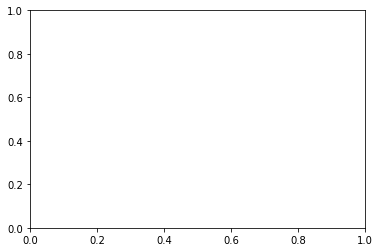

In [38]:
# figure(figsize=(8,6))
pcolor(x,y,aam) # 2 рисунок

Очевидно, что массив надо транспонировать

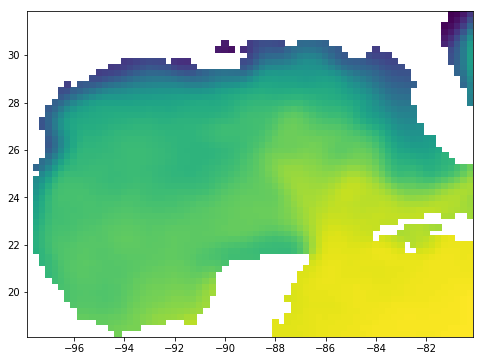

In [39]:
figure(figsize=(8,6))
pcolor(x,y,aam.T) # 2 рисунок

Text(0.5, 1.0, 'Mean SST in 2013 year')

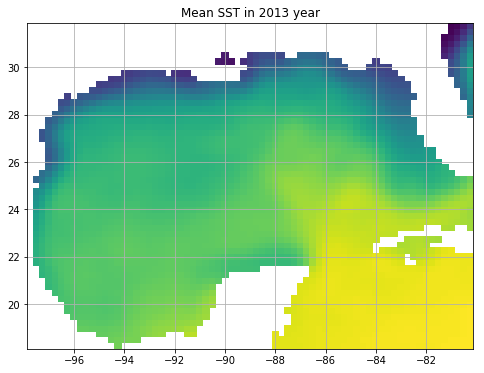

In [40]:
figure(figsize=(8,6))
pcolor(x,y,aam.T)
grid()
title('Mean SST in '+str(yu1)+' year')

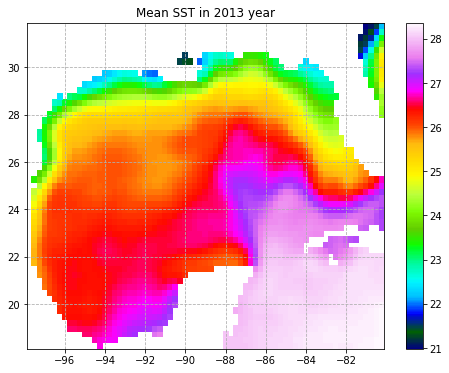

In [41]:
figure(figsize=(8,6))
pcolor(x,y,aam.T,cmap='gist_ncar')
colorbar()
grid(linestyle='--')
title('Mean SST in '+str(yu1)+' year')
savefig('Results/SST_Reinolds_7D/from_python.png',dpi=300,bbox_inches='tight')